# Test Notebook to learn how to read in GPS

### Some sources of GPS data

Greenland

http://go-gnet.org/data/

https://www.unavco.org/data/gps-gnss/data-access-methods/data-access-methods.html

____

### Load in some modules

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm

from tidegauge_functions import read_GPS_SONEL

%matplotlib inline

### Specify directories and filenames
and other runtime options

In [2]:
dir_in = 'data/GPS'
file_in = 'KULU.cwu.nam14.csv'
ext = 'csv'

In [3]:
filepath = os.path.join(dir_in, file_in)

### Basic `read_csv` to peek into the csv file

In [4]:
# with open(filepath) as myfile:
#     firstNlines=myfile.readlines()[0:5] #put here the interval you want
    
# print(firstNlines)

with open(filepath) as myfile:
    head = [next(myfile) for x in range(13)]
print(head)

['PBO Station Position Time Series.\n', 'Format Version, 1.2.0\n', 'Reference Frame, NAM14\n', '4-character ID, KULU\n', 'Station name, Kulusuk_GPS     \n', 'Begin Date, 1996-07-25\n', 'End Date, 2019-08-13\n', 'Release Date, 2020-02-13\n', 'Source file, KULU.cwu.nam14.pos\n', 'Offset from source file, -6.35 mm North, -27.61 mm East, 69.00 mm Vertical\n', 'Reference position, 65.5793353842 North Latitude, -37.1493578847 East Longitude, 67.48358 meters elevation\n', 'Date, North (mm), East (mm), Vertical (mm), North Std. Deviation (mm), East Std. Deviation (mm), Vertical Std. Deviation (mm), Quality,\n', '1996-07-25,0.00, 0.00, 0.00, 3.08, 2.19, 9.93, repro,\n']


In [5]:
df = pd.read_csv(filepath, skiprows=12, header=None)
df


,0,1,2,3,4,5,6,7,8
0,1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro,NaN
1,1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro,NaN
2,1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro,NaN
3,1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro,NaN
4,1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro,NaN
...,...,...,...,...,...,...,...,...,...
6677,2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf,NaN
6678,2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf,NaN
6679,2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf,NaN
6680,2019-08-12,-18.85,-54.11,147.44,2.20,1.52,7.61,suppf,NaN


In [6]:
column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
df = pd.read_csv(filepath, skiprows=12, header=None, names=column_names)
dt = pd.to_datetime(df['Date'])
df.index = pd.DatetimeIndex(dt)
df = df.drop('Date', axis=1)
df = df.drop('NaN', axis=1)
df

,North,East,Vertical,NorthSTD,EastSTD,VerticalSTD,Quality
Date,,,,,,,
1996-07-25,0.00,0.00,0.00,3.08,2.19,9.93,repro
1996-07-26,-1.07,-0.16,-0.64,3.72,2.64,12.29,repro
1996-07-27,0.16,-2.04,11.45,4.15,2.93,13.92,repro
1996-07-28,-0.53,-0.65,11.62,3.05,2.19,10.03,repro
1996-07-29,-5.19,-0.85,5.00,2.90,2.07,9.80,repro
...,...,...,...,...,...,...,...
2019-08-09,-18.97,-54.44,142.87,2.15,1.47,7.51,suppf
2019-08-10,-19.59,-53.63,146.31,2.26,1.54,7.76,suppf
2019-08-11,-19.04,-53.98,150.46,2.28,1.52,7.57,suppf


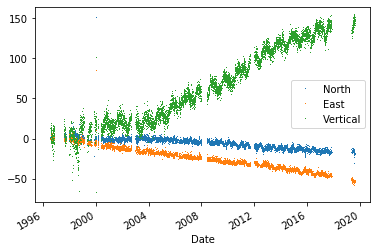

In [7]:
df[['North', 'East', 'Vertical']].plot(linestyle='', marker=',')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8530d5aad0>],
      dtype=object)

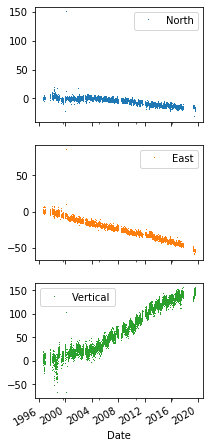

In [8]:
df[['North', 'East', 'Vertical']].plot(subplots=True, 
                                       layout=(3, 1), figsize=(3, 8), 
                                       linestyle='', marker=',',
                                       sharex=True)

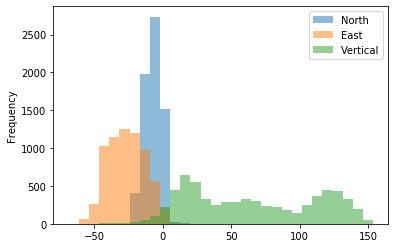

In [9]:
df[['North', 'East', 'Vertical']].plot.hist(alpha=0.5, bins=30)

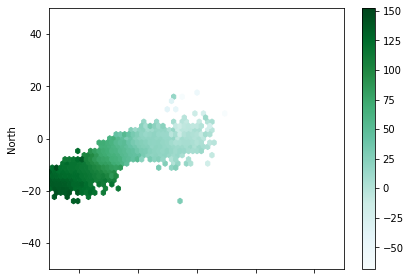

In [10]:
df.plot.hexbin(x='East', y='North', C='Vertical')
plt.xlim([-50, 50])
plt.ylim([-50, 50])
plt.tight_layout()

In [11]:
df.index[-1] - df.index[0]

Timedelta('8419 days 00:00:00')

# Read in SONEL

In [12]:
station = 'NUUK'
datum = 'NGL14'
ext = '.neu'
file_in = 'd' + station + '_43013M001_' + datum + ext
dir_in = 'data/GPS'
filepath = os.path.join(dir_in, file_in)
print(filepath)

data/GPS/dNUUK_43013M001_NGL14.neu


In [13]:
# column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
df = pd.read_csv(filepath, skiprows=22, header=None, delimiter='\s+', names=column_names)
# dt = pd.to_datetime(df['Year'])
# df.index = pd.DatetimeIndex(dt)
# df = df.drop('Date', axis=1)
# df = df.drop('NaN', axis=1)
df

,Year,DN,DE,DU,SDN,SDE,SDU
0,2008.7502,-0.0470,0.0758,-0.0311,0.0033,0.0023,0.0054
1,2008.7556,-0.0473,0.0769,-0.0288,0.0021,0.0014,0.0035
2,2008.7584,-0.0463,0.0764,-0.0275,0.0021,0.0014,0.0035
3,2009.0021,-0.0431,0.0743,-0.0350,0.0021,0.0014,0.0034
4,2009.0048,-0.0426,0.0744,-0.0365,0.0021,0.0014,0.0035
...,...,...,...,...,...,...,...
2829,2019.4497,0.0794,-0.1144,-0.0170,0.0021,0.0014,0.0034
2830,2019.4524,0.0796,-0.1157,-0.0229,0.0021,0.0014,0.0034
2831,2019.4552,0.0813,-0.1154,-0.0155,0.0021,0.0014,0.0034
2832,2019.4579,0.0802,-0.1171,-0.0123,0.0020,0.0014,0.0034


In [14]:
# # if necessary
# df['Year'] = df['Year'].astype(str)
# a = df['Year'].str[:4]
# b = df['Year'].str[5:].map(d)

# dt = pd.to_datetime(a + '.' + b, format='%Y.%m')
# print(dt)

In [15]:
year = df['Year'].astype(int)
print (year.describe())

# b = df['Year'].sub(a).add(1/12).mul(12).round(0).astype(int)
doy = ((df['Year'] - year) * 365).astype(int) + 1
print (doy.describe())

count    2834.000000
mean     2012.441426
std         2.295715
min      2008.000000
25%      2010.000000
50%      2012.000000
75%      2014.000000
max      2019.000000
Name: Year, dtype: float64
count    2834.000000
mean      179.447777
std       103.658786
min         1.000000
25%        91.000000
50%       178.500000
75%       267.000000
max       365.000000
Name: Year, dtype: float64


In [16]:
year[doy==365]

366     2009
726     2010
1081    2011
1446    2012
1801    2013
2163    2014
2528    2015
Name: Year, dtype: int64

0      2008-09-30
1      2008-10-02
2      2008-10-03
3      2009-01-01
4      2009-01-02
          ...    
2829   2019-06-14
2830   2019-06-15
2831   2019-06-16
2832   2019-06-17
2833   2019-06-18
Name: Year, Length: 2834, dtype: datetime64[ns]


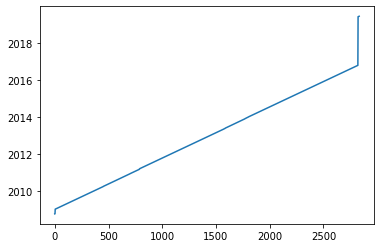

In [17]:
c = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
print(c)
c.plot()

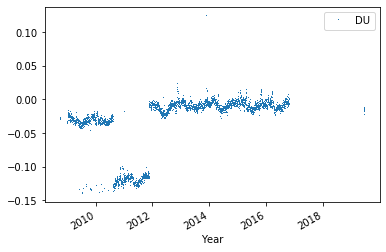

In [18]:
# column_names=['Date', 'North', 'East', 'Vertical', 'NorthSTD', 'EastSTD', 'VerticalSTD', 'Quality', 'NaN'] 
column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
df = pd.read_csv(filepath, skiprows=22, header=None, delimiter='\s+', names=column_names)
year = df['Year'].astype(int)
doy = ((df['Year'] - year) * 365).astype(int) + 1
dt = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
df = df.rename(columns={'Year': 'YearDec'})
df.index = pd.DatetimeIndex(dt)
# df = df.drop('Date', axis=1)
# df = df.drop('NaN', axis=1)
df[['DU']].plot(linestyle='',marker=',')

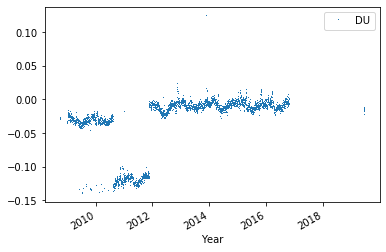

In [19]:
def test_read_GPS_SONEL(sonel_file):
    column_names=['Year', 'DN', 'DE', 'DU', 'SDN', 'SDE', 'SDU']
    df = pd.read_csv(sonel_file, skiprows=22, header=None, delimiter='\s+', names=column_names)
    year = df['Year'].astype(int)
    doy = ((df['Year'] - year) * 365).astype(int) + 1
    dt = pd.to_datetime(year.astype(str) + doy.astype(str), format='%Y%j')
    df = df.rename(columns={'Year': 'YearDec'})
    df.index = pd.DatetimeIndex(dt)

    return df

df_sonel = test_read_GPS_SONEL(filepath)

df_sonel[['DU']].plot(linestyle='',marker=',')



Now using function imported from file...

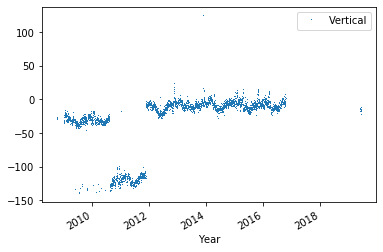

In [20]:
df_sonel = read_GPS_SONEL(filepath)

df_sonel[['Vertical']].plot(linestyle='',marker=',')

# Resample to MONTHLY data

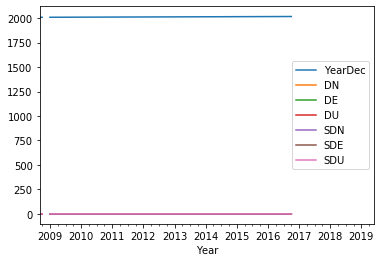

In [21]:
df_monthly = df.dropna().resample('1M').mean()
df_monthly.plot()

## Loop through files

In [22]:
station = 'NUUK'
datum = 'NGL14'
ext = '.neu'
file_in = 'd' + station + '_43013M001_' + datum + ext
dir_in = 'data/GPS'

In [23]:

pattern = os.path.join(dir_in, 'd*' + datum + ext)
print(pattern)

data/GPS/d*NGL14.neu


In [24]:
import glob

filenames = sorted(glob.glob(pattern))  # , key=alphanum_key)
print(filenames)


['data/GPS/dAKSE_XXXXXXXXX_NGL14.neu', 'data/GPS/dAKSI_XXXXXXXXX_NGL14.neu', 'data/GPS/dANC2_XXXXXXXXX_NGL14.neu', 'data/GPS/dJNU1_49519S001_NGL14.neu', 'data/GPS/dKEN5_XXXXXXXXX_NGL14.neu', 'data/GPS/dNUUK_43013M001_NGL14.neu', 'data/GPS/dTBON_XXXXXXXXX_NGL14.neu']


In [25]:
for f, filepath in enumerate(filenames):
    df = read_GPS_SONEL(filepath)
    print(f'\n\n{filepath}')
    print(df.head())



data/GPS/dAKSE_XXXXXXXXX_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2017-09-27   -5.5   6.0       9.7       2.5      1.7          3.4
2017-09-28   -7.9   6.5      11.0       2.5      1.7          3.5
2017-09-29   -7.1   5.5       7.0       2.4      1.6          3.3
2017-09-30   -5.1   3.6      -2.1       2.4      1.6          3.3
2017-10-01   -4.4   3.1      -0.6       2.4      1.6          3.4


data/GPS/dAKSI_XXXXXXXXX_NGL14.neu
            North  East  Vertical  NorthSTD  EastSTD  VerticalSTD
Year                                                             
2018-01-17    5.8   6.5       7.1       2.2      1.6          2.8
2018-01-18    4.9   7.0       7.5       2.2      1.6          2.8
2018-01-19    3.9   6.4       7.7       2.2      1.6          2.8
2018-01-20    5.2   6.9       4.3       2.2      1.6          2.7
2018-01-21    6.3   6.9       2.8       2.2      1.6          2.8




### write some test functions for linear regression and plotting

In [26]:
def test_calc_OLS(df, var):
    
    x, y = np.arange(len(df[var].dropna())), df[var].dropna()
    x = sm.add_constant(x)
    model = sm.OLS(y, x)
    res = model.fit()
    
    return res

def test_plot_OLS_overlay(df, res, site, var, data_units, simpletrend=True):
    fig, ax = plt.subplots(1, 1, figsize=(12,6));
    ax.plot(df[var].dropna().index, df[var].dropna().values, 
            label='Data', marker=',', linestyle='', color='black')
    
    ## Plot linea model
    if simpletrend:
        ax.plot((df[var].index[0], df[var].index[-1]), 
            (res.params.x1*1 + res.params.const, res.params.x1*df.shape[0] + res.params.const),
               label='Trend', linestyle='--', color='purple')
    else:
            ax.plot(df[var].index, [res.params.x1*i + res.params.const for i in np.arange(len(df[var]))])

    ## zero line
#     ax.plot((df[var].index[0], df[var].index[-1]), (0, 0), 'k')
    
    ## customize
#     ax.set_title(f"Trend = {res.params.x1 * 1000:.2f} mm/yr");
    ax.set_ylabel(data_units)
    plt.suptitle(f"{site}")
    plt.legend()
    plt.savefig(f'figs/test_GPS_OLS_{site}.png')
    
    
res = test_calc_OLS(df, 'Vertical')

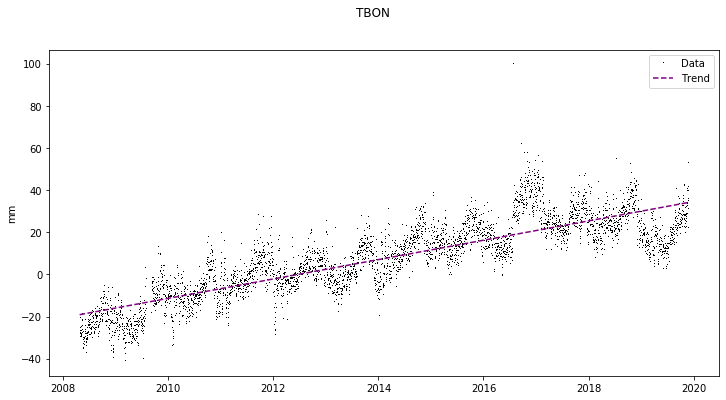

In [27]:
# test_plot_OLS_overlay(df, res, filepath[-24:-20], 'DU', 'meters')
from tidegauge_functions import plot_OLS_overlay

plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')

%%% as pointed out by isaiah we need to convert time units for our trends

In [28]:
def convert_trend_toyearly(df, res):
    period = df.index.year.value_counts().max()
    yearlytrend = res.params.x1 * period
    
    return yearlytrend

trend = convert_trend_toyearly(df, res)
print(f'{trend:1.4f} mm/yr')


4.6644 mm/yr


## Loop through each file, save trend, and plot ALL WITH FUNCTIONS



data/GPS/dAKSE_XXXXXXXXX_NGL14.neu
f: 0
Trend = 36.67 mm/yr


data/GPS/dAKSI_XXXXXXXXX_NGL14.neu
f: 1
Trend = 83.37 mm/yr


data/GPS/dANC2_XXXXXXXXX_NGL14.neu
f: 2
Trend = 6.84 mm/yr


data/GPS/dJNU1_49519S001_NGL14.neu
f: 3
Trend = 49.87 mm/yr


data/GPS/dKEN5_XXXXXXXXX_NGL14.neu
f: 4
Trend = 62.81 mm/yr


data/GPS/dNUUK_43013M001_NGL14.neu
f: 5
Trend = 25.23 mm/yr


data/GPS/dTBON_XXXXXXXXX_NGL14.neu
f: 6
Trend = 12.78 mm/yr


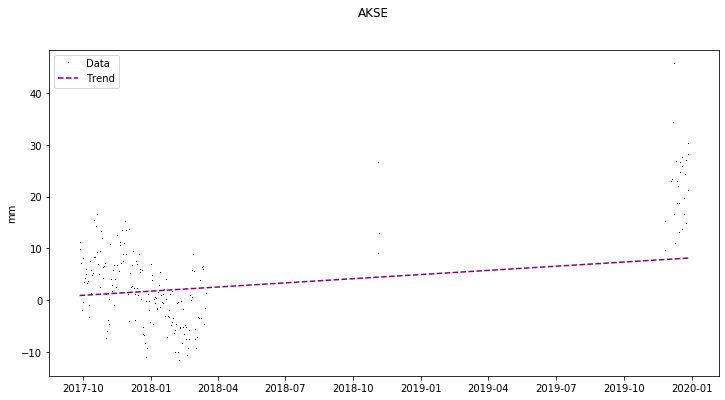

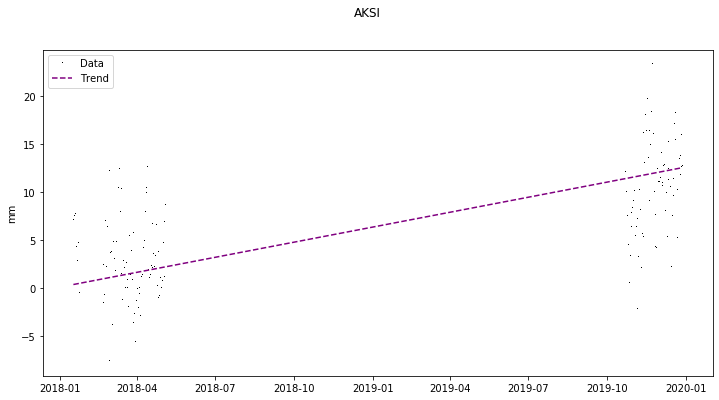

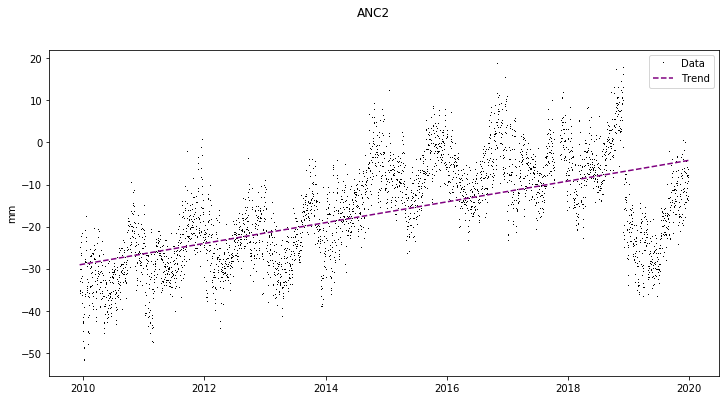

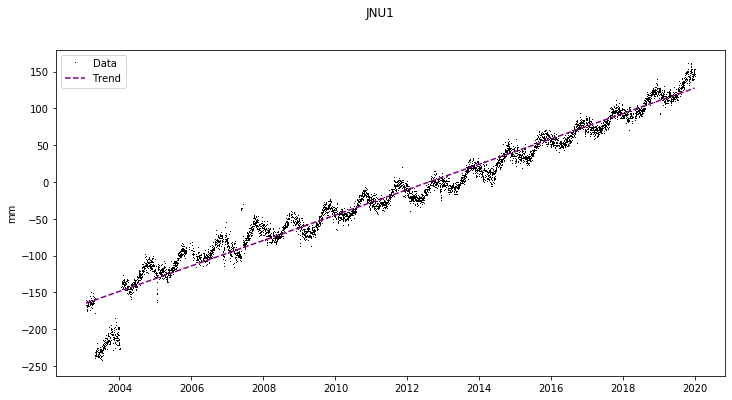

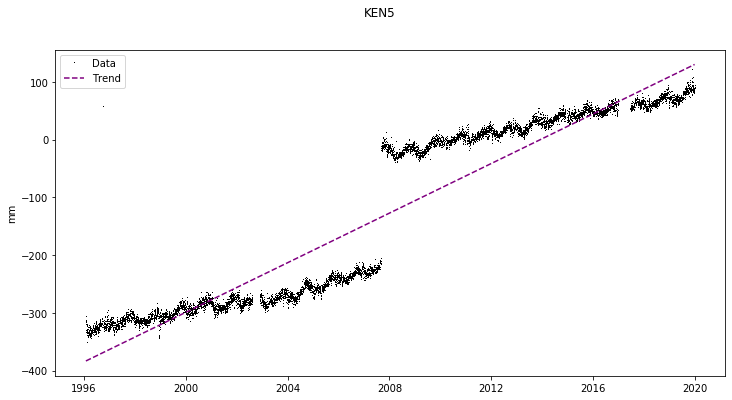

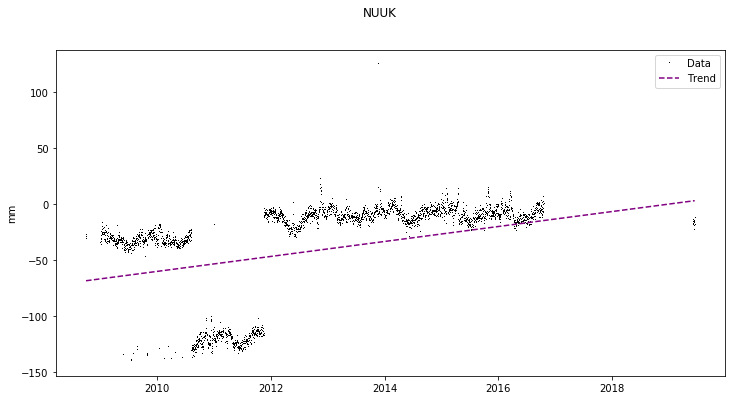

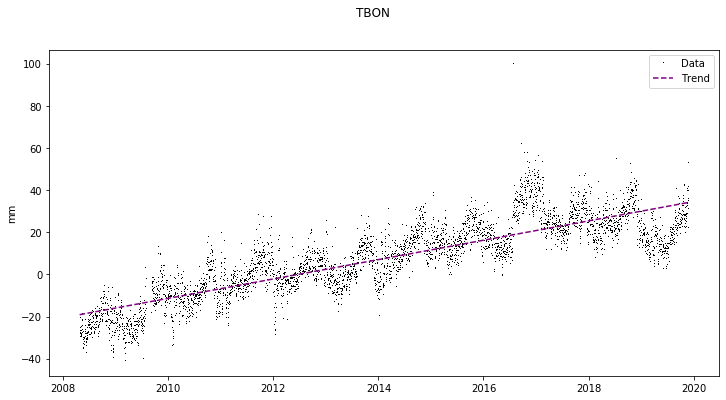

In [29]:
sonel_trend_array = np.full(np.shape(filenames)[0], np.nan)
site_name_array = []


for f, filepath in enumerate(filenames):
    print(f'\n\n{filepath}')
    print(f'f: {f}')
    ## ToDo - extract and keep other important thing about each site from the file...Lat/Lon, name, etc.
    
    # Read in data
    df = read_GPS_SONEL(filepath)

    # Get trend using linear regression
    res = test_calc_OLS(df, 'Vertical')
    sonel_trend_array[f] = res.params.x1
    
    # Save site name
    site_name_array.append(filepath[-24:-20])
    
    print(f"Trend = {sonel_trend_array[f] * 1000:.2f} mm/yr")
#     print(res.summary())

    # Make Plot
    test_plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')
#     plot_OLS_overlay(df, res, filepath[-24:-20], 'Vertical', 'mm')


In [30]:
print(sonel_trend_array)
print(site_name_array)


[0.03666618 0.08336557 0.00683767 0.04987282 0.06280627 0.02523198
 0.0127793 ]
['AKSE', 'AKSI', 'ANC2', 'JNU1', 'KEN5', 'NUUK', 'TBON']


## Write to CSV

In [86]:
columns = ['TREND_sonel', 'SITE']
out_array = np.array([sonel_trend_array,
                      site_name_array])

df = pd.DataFrame(data=out_array.T, columns=columns) #, index=time)
df = df.apply(pd.to_numeric, errors='ignore')
# df.index = pd.to_datetime(trajectory.index)
df.to_csv('data/trends_OLS_SONEL.csv')  # , na_rep=" ")

### test function to extract some details from a header

In [85]:
def get_SONEL_headerinfo(infile):
    with open(infile, "r") as f:
        for line in f:
#             print(line)
            if 'Site ID' in line:
                site = line.split(':')[1].split(' ')[1][:-1]
            if 'Latitude' in line:
                lat = line.split(':')[1].split(' ')[3]
            if 'Longitude' in line:
                lon = line.split(':')[1].split(' ')[1]
            if 'Height' in line:
#                 print(line)
#                 print(line.split(':'))
                height = line.split(':')[1].split(' ')[2]
    
#                 lat = line.index('Latitude')
#                 numbers.append(line[start:start+13])
    
    return site, lat, lon, height

# site_id, latitude, longitude, height = get_SONEL_headerinfo(filenames[0])
get_SONEL_headerinfo(filenames[0])

('AKSE', '60.13249764', '-149.43648824', '44.359')